# Ontario Fish Stocking

This notebook contains a series of cells that analyzes open data on fish stocking in Ontario, Canada

----

In [4]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Dowloading Data: Ontario Fish Stocking CSV

In [5]:
ontario_df = pd.read_csv('../data/ON_Stocking.csv')

In [6]:
ontario_df.shape

(13757, 15)

In [7]:
ontario_df.head(10)

,X,Y,MNRF_District,Stocking_Year,Species,Official_Waterbody_Name,Official_French_Waterbody_Name,Unoffcial_Waterbody_Name,Waterbody_Location_Identifier,Geographic_Township,Developmental_Stage,Number_of_Fish_Stocked,Latitude,Longitude,ObjectId
0,-76.929648,44.989589,Bancroft District,2013,Brook Trout,Crooked Lake,lac Crooked,NaN,18-3479-49834,CLARENDON,Yearlings,2000,44.989589,-76.929648,1
1,-77.609710,44.973660,Bancroft District,2013,Brook Trout,Currie Lake,lac Currie,NaN,18-2942-49831,CASHEL,Yearlings,750,44.973660,-77.609710,2
2,-78.148330,45.038380,Bancroft District,2013,Brook Trout,Dixie Lake,lac Dixie,NaN,17-7246-49909,CARDIFF,Yearlings,800,45.038380,-78.148330,3
3,-77.612480,44.981160,Bancroft District,2013,Brook Trout,East Tommy Lake,lac Tommy Est,NaN,18-2940-49840,CASHEL,Yearlings,1100,44.981160,-77.612480,4
4,-77.285520,44.994220,Bancroft District,2013,Brook Trout,Feeny Lake,lac Feeny,NaN,18-3198-49846,EFFINGHAM,Yearlings,800,44.994220,-77.285520,5
5,-77.807040,45.587660,Bancroft District,2013,Brook Trout,Finger Lake,lac Finger,NaN,18-2816-50514,DICKENS,Yearlings,800,45.587660,-77.807040,6
6,-76.961620,45.120330,Bancroft District,2013,Brook Trout,Graham Lake,lac Graham,NaN,18-3457-49980,MILLER,Yearlings,500,45.120330,-76.961620,7
7,-77.289970,45.093380,Bancroft District,2013,Brook Trout,Greggs Lake,lac Greggs,NaN,18-3198-49957,DENBIGH,Yearlings,600,45.093380,-77.289970,8
8,-78.176801,45.026502,Bancroft District,2013,Brook Trout,Halls Lake,lac Halls,NaN,17-7224-49896,CARDIFF,Yearlings,800,45.026502,-78.176801,9
9,-78.443900,45.212560,Bancroft District,2013,Brook Trout,Harburn Lake,lac Harburn,NaN,17-7007-50095,HARBURN,Yearlings,3100,45.212560,-78.443900,10


## Cleaning up & Applying Filters

### Extracting Occurrences Where Lake Ontario Was Stocked

In [8]:
lake_ontario = ontario_df.loc[ontario_df['Official_Waterbody_Name'] == "Lake Ontario"]
lake_ontario.shape

(238, 15)

In [9]:
lake_ontario['Stocking_Year'].unique()

array([2013, 2017, 2014, 2015, 2016, 2020, 2021, 2018, 2022, 2019, 2023])

### Extracting Required Years (2013 - 2021)

year_filter = lake_ontario['Stocking_Year'] <2022
ca_lake_ontario = lake_ontario[year_filter]
ca_lake_ontario['Stocking_Year'].unique()

In [18]:
ca_lake_ontario.to_csv('../data/ON_lakeontario_2013-2021.csv', index=False)

## Exploring Species Stocked

In [11]:
ca_species = ca_lake_ontario['Species'].unique()
print(ca_species)

['Brown Trout' 'Chinook Salmon' 'Lake Trout' 'Rainbow Trout'
 'Atlantic Salmon']


In [12]:
ca_species_count = ca_lake_ontario['Species'].value_counts()
print(ca_species_count)

Brown Trout        79
Chinook Salmon     76
Lake Trout         25
Rainbow Trout      18
Atlantic Salmon    17
Name: Species, dtype: int64


### Creating a data subset grouped by Stocking Year followed by Species

In [13]:
species_by_year = ca_lake_ontario.groupby('Stocking_Year')['Species'].value_counts().unstack()
species_by_year

Species,Atlantic Salmon,Brown Trout,Chinook Salmon,Lake Trout,Rainbow Trout
Stocking_Year,,,,,
2013,NaN,10.0,9.0,2.0,2.0
2014,NaN,9.0,10.0,3.0,3.0
2015,NaN,6.0,11.0,11.0,4.0
2016,1.0,8.0,9.0,8.0,NaN
2017,NaN,9.0,9.0,NaN,1.0
2018,3.0,9.0,7.0,NaN,2.0
2019,8.0,9.0,9.0,NaN,1.0
2020,NaN,8.0,8.0,1.0,2.0
2021,5.0,11.0,4.0,NaN,3.0


#### Plotting Number of Fish Stocking Occurrences by Species

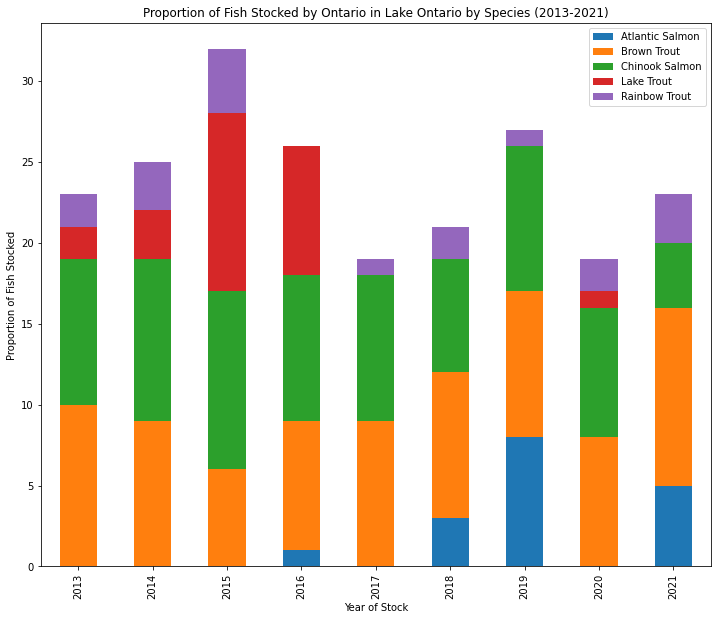

In [15]:
species_by_year.plot(kind='bar', stacked=True, figsize=(12,10))
plt.ylabel('Proportion of Fish Stocked')
plt.xlabel('Year of Stock')
plt.title('Proportion of Fish Stocked by Ontario in Lake Ontario by Species (2013-2021)')
plt.legend(
   bbox_to_anchor=(0.8, 0.4, 0.2, 0.6))
plt.show()

By plotting the subset grouped by Stocking Year and Species, we can create a bar graph demonstrating the proportion of occurrences each of the five fish species were stocked in Lake Ontario. 

The x-axis spans the years (2013-2021), while the y-axis shows the number of times that species was stocked that year. We can immediately tell that Brown Trout and Chinook Salmon are disproportionately stocked compared to the other three species.

### Creating data subset grouped by Stocking Year and Species followed by Number of Fish Stocked

In [16]:
species_amount_by_year = ca_lake_ontario.groupby(['Stocking_Year', 'Species'])['Number_of_Fish_Stocked'].sum().unstack()
species_amount_by_year

Species,Atlantic Salmon,Brown Trout,Chinook Salmon,Lake Trout,Rainbow Trout
Stocking_Year,,,,,
2013,NaN,141797.0,283457.0,72180.0,39866.0
2014,NaN,135716.0,238257.0,155585.0,40122.0
2015,NaN,151927.0,215645.0,93223.0,53016.0
2016,25004.0,163727.0,308190.0,134141.0,NaN
2017,NaN,173741.0,209360.0,NaN,23759.0
2018,416.0,177911.0,196554.0,NaN,29238.0
2019,597.0,178721.0,203040.0,NaN,29160.0
2020,NaN,156320.0,382415.0,14458.0,30137.0
2021,984.0,161158.0,179839.0,NaN,31617.0


#### Plotting Amount of Fish Stocked by Year and Species

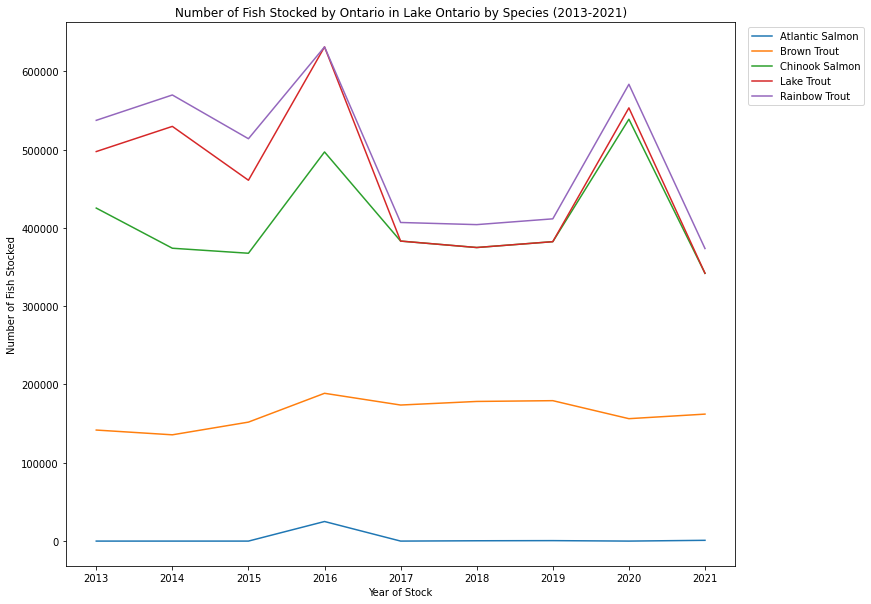

In [17]:
species_amount_by_year.plot(kind='line', stacked=True, figsize=(12,10))
plt.ylabel('Number of Fish Stocked')
plt.xlabel('Year of Stock')
plt.title('Number of Fish Stocked by Ontario in Lake Ontario by Species (2013-2021)')
plt.legend(
   bbox_to_anchor=(1, 0.4, 0.2, 0.6))
plt.show()

By plotting the subset of fish stocked by year followed by species, we can create a line graph demonstrating the amount each of the five fish species were stocked in Lake Ontario across the years.

The x-axis spans the years (2013-2021), while the y-axis shows the amount of fish that were stocked that year. We can immediately tell that Chinook Salmon, Lake Trout, and Rainbow Trout have a disproportionate amount of fish stocked compared to Atlantic Salmon and Brown Trout.